## Linear Regression

LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation.

**Best Fit line : y=mx+c**

* where 
      m = Slope  (m defines unit change of x var wat is the impact in y )
      x = Independent variable 
      c = Intercept
*  Best fit line can be said when sum of residuals score should be minimal
   Cost function : 1/2n (sum(y_pred-y_true)**2)
   
   where 
         n= total no of points
         y_pred = predicted values (y_pred=mx+c)
         y_true = actual values
         
         
         
 **STEPS:**
1. Calculate value of y_pred for every value of m
2. Calculate Cost function 
2. Gradient descent Curve : Plot graph between cost function and m 
3. To stop plotting m on Gradient descent curve -- When we reach to global minima where cost function is minimal.This can be done by applying Convergence Thorem
   Convergence Thorem: m=m - derivative(m)/dm * alpha 
   where alpha = learning rate

   
    

      
 

For Reference:
1. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Assumption
1. **Linear Assumption**. Linear regression assumes that the relationship between your input and output is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).
2. **Remove Noise**. Linear regression assumes that your input and output variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.
3. **Remove Collinearity**. Linear regression will over-fit your data when you have highly correlated input variables. Consider calculating pairwise correlations for your input data and removing the most correlated.
4. **Gaussian Distributions**. Linear regression will make more reliable predictions if your input and output variables have a Gaussian distribution. You may get some benefit using transforms (e.g. log or BoxCox) on you variables to make their distribution more Gaussian looking.
5. **Rescale Inputs**: Linear regression will often make more reliable predictions if you rescale input variables using standardization or normalization.

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split


In [94]:
df=pd.read_csv("../input/real-estate-price-prediction/Real estate.csv")
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


Taking only one Independent variable for starting purpose

In [95]:
X=df['X2 house age']
y=df['Y house price of unit area']

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


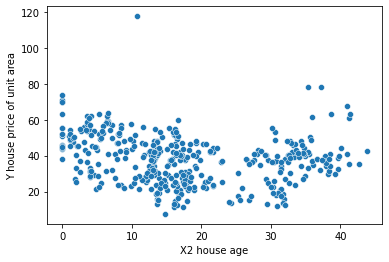

In [96]:
## For relation between independent and dependent variable
sns.scatterplot(X, y)
plt.ylabel('Y house price of unit area')
plt.xlabel('X2 house age')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='X2 house age'>

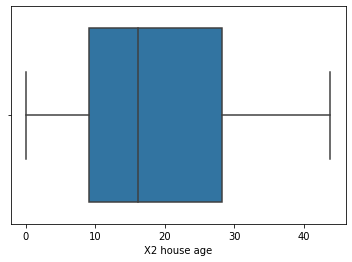

In [97]:
##For outliers
sns.boxplot(X)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='X2 house age', ylabel='Density'>

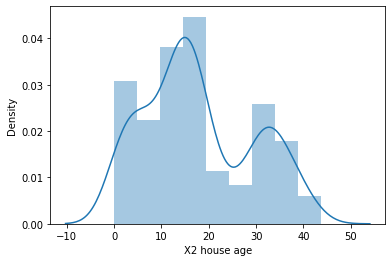

In [98]:
##For distribution
sns.distplot(X)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


**Fit Linear Model**

* X.shape  (n_samples, n_features)
* y.shape  (n_samples,) or (n_samples, n_targets)



In [100]:
np.array(X_train).reshape(-1,1).shape,np.array(y_train).shape

((289, 1), (289,))

In [101]:
lr = LinearRegression()
lr.fit(np.array(X_train).reshape(-1,1), np.array(y_train))

LinearRegression()

**Get parameters for this estimator.**

In [102]:
lr.get_params(deep=True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

**Return the coefficient of determination R2 of the prediction.**

* The coefficient R2 is defined as (1 − u /v) , where **u is the** **residual sum of squares** **((y_true - y_pred) ** 2).sum()** and **v is the total sum of squares ((y_true - y_true.mean()) ** 2).sum()**. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R 2 score of 0.0.

In [103]:
lr.score(np.array(X_train).reshape(-1,1), np.array(y_train))

0.04201594287124144

In [104]:
lr.coef_,lr.intercept_

(array([-0.24921325]), 42.79051033835305)

**Predict using the linear model.**

In [105]:
lr.predict(np.array(X_test).reshape(-1,1))

array([42.51637577, 39.50089547, 42.79051034, 39.62550209, 37.75640273,
       34.69107978, 38.8280197 , 38.75325572, 34.84060773, 41.1457029 ,
       36.48541517, 41.79365735, 41.51952277, 34.89045038, 33.17087897,
       39.12707559, 34.41694521, 41.9431853 , 38.47912115, 39.0273903 ,
       35.08982098, 38.3295932 , 41.4447588 , 39.40121017, 39.42613149,
       39.62550209, 38.75325572, 42.79051034, 32.5976885 , 32.4980032 ,
       36.33588722, 41.51952277, 34.64123713, 38.30467188, 38.67849175,
       33.39517089, 41.32015218, 39.37628884, 35.16458495, 32.47308188,
       33.89359739, 37.48226816, 34.81568641, 38.90278367, 39.55073812,
       40.32329918, 38.37943585, 39.27660354, 42.41669047, 34.59139448,
       42.51637577, 41.8435    , 33.99328269, 35.93714602, 35.26427025,
       39.35136752, 33.79391209, 39.37628884, 37.68163876, 38.75325572,
       40.89648965, 35.48856218, 39.35136752, 36.08667397, 38.45419983,
       38.35451453, 39.12707559, 37.38258286, 33.27056427, 39.79

In [106]:
y_pred=lr.predict(np.array(X_test).reshape(-1,1))

In [107]:
pred_df=pd.DataFrame(data=zip(X_test,y_test,y_pred),columns=['X','y_true','y_pred'])
pred_df['y_pred=mx+c']=pred_df['X'].apply(lambda x : lr.coef_*x + lr.intercept_ )
pred_df.head()

,X,y_true,y_pred,y_pred=mx+c
0,1.1,45.1,42.516376,[42.51637576567415]
1,13.2,42.3,39.500895,[39.50089546620623]
2,0.0,52.2,42.790510,[42.79051033835305]
3,12.7,37.3,39.625502,[39.62550209015119]
4,20.2,22.8,37.756403,[37.75640273097685]


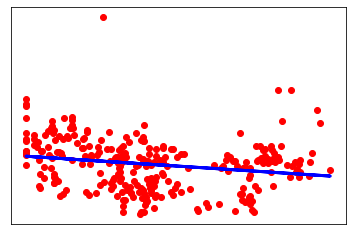

In [108]:
# Plot outputs for Training Dataset
plt.scatter(X_train, y_train,  color='red')
plt.plot(X_train, lr.predict(np.array(X_train).reshape(-1,1)), color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

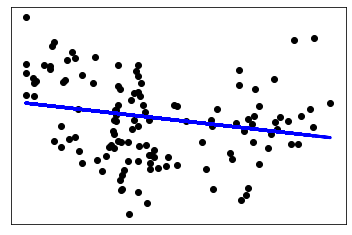

In [109]:
# Plot outputs for Testing Datsset
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()